In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir(r'D:\새 폴더\Programing\Academy\Python\day0828')

# sns.set_theme(font='Malgun Gothic') # 이렇게도 한글폰트 지정가능, window


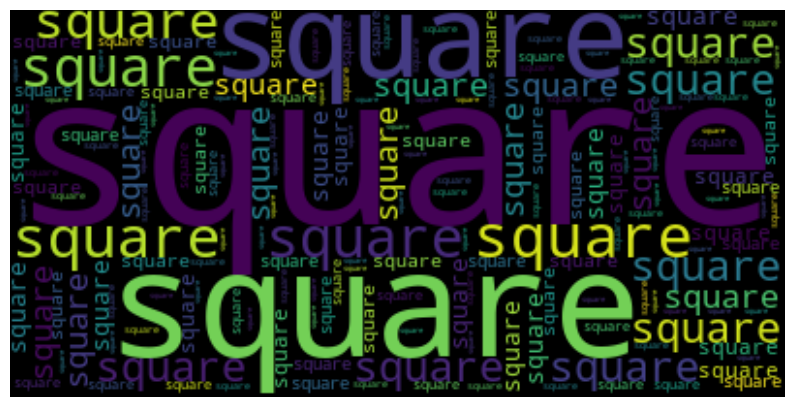

In [4]:
text='square'
wc=WordCloud(background_color='black',repeat=True) # repeat : 단어반복여부
wc.generate(text) # text 기반으로 생성

plt.figure(figsize=(10,6)) # 크기 지정
plt.axis('off') # 축 숨기기
plt.imshow(wc, interpolation='bilinear') # 이미지를 표시 (부드럽게) 블러
# plt.imshow(wc) 

plt.show()

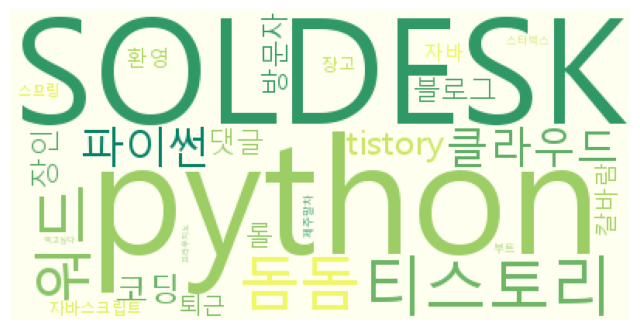

In [5]:
words = {
    'python':1965,
    'SOLDESK':1666,
    '티스토리':955,
    '돔돔':855,
    '워드':841,
    '클라우드':612,
    '파이썬':598,
    'tistory':576,
    '코딩':542,
    '장인':487,
    '블로그':412,
    '방문자':401,
    '댓글':397,
    '롤':391,
    '칼바람':308,
    '퇴근':284,
    '환영':255,
    '자바':231,
    '장고':175,
    '자바스크립트':152,
    '스프링':109,
    '부트':71,
    '스타벅스':68,
    '제주말차':59,
    '프라푸치노':21,
    '먹고싶다':19,
    '디저트':6,
    '꿀잼':2
}

wc=WordCloud(
    font_path = "c:/Windows/fonts/malgun.ttf", # 한글 글씨체 설정
   #font_path = '/Library/Fonts/NanumBarunGothic.ttf', # mac 한글글씨체 
    background_color='ivory', # 배경색
    colormap='summer', # 글씨색
    # width=800, height=600
)

cloud=wc.generate_from_frequencies(words) # dict를 통해 빈도수 지정

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

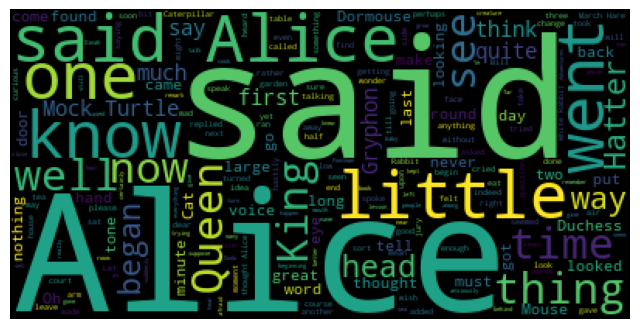

In [6]:
# 파일을 읽어서 wc로 출력
with open('data_analysis/img/alice.txt','r') as f:
    text =f.read()

wc=WordCloud(background_color='black',repeat=True)
wc.generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

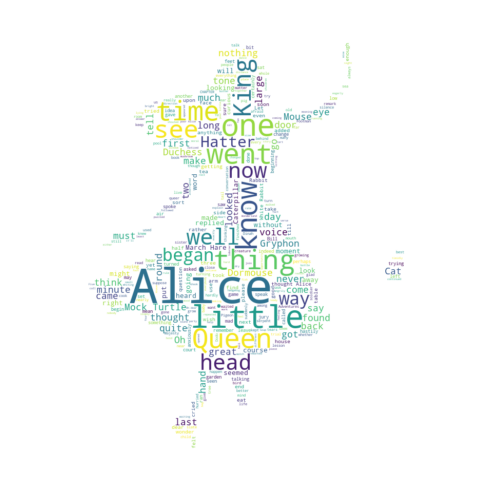

In [7]:
# masking
from PIL import Image
import numpy as np
from wordcloud import WordCloud,STOPWORDS


with open('data_analysis/img/alice.txt','r') as f:
    text =f.read()

alice_mask=np.array(Image.open('data_analysis/img/alice_mask.png'))


stopwords=set(STOPWORDS)
stopwords.add('said')

wc=WordCloud(background_color='white',max_words=2000,mask=alice_mask
            ,stopwords=stopwords,contour_width=0,contour_color='steelblue'
            ) 
    # 배경색, 단어 개수 제한, 모양 배치, 제외할 단어 지정, 테두리 두께 및 테두리 색상 설정

wc.generate(text)
wc.to_file('data_analysis/img/alice_cloud.png')

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
# Quiz1) movie.csv 파일을 로드한 후 데이터프레임으로 생성하시오.

# Quiz2) x 축은 영화명, y축은 평점인 막대 그래프를 작성하시오(matplotlib 이용)

# Quiz3) Quiz2에서 작성한 그래프에 대해 세부 설정을 적용하시오
# 제목 : 국내 Top12 영화흥행기록
# x축 label : 영화, y축 label : 평점
# x축의 tick 은 45도로 설정

# Quiz4) 평점이 9점 이상인 영화와 아닌 영화의 비율을 확인할 수 있는 pie 그래프 작성(matplotlib 이용)

# Quiz5) 개봉연도별 평점 변화 추이를 선 그래프로 작성하시오.(seaborn 으로 한다.)

# Quiz6) Quiz5에서 작성한 그래프의 x축 눈금 단위를 [2006,2012,2018,2024] 로 변경하시오.
# 그래프 사이즈는 (10,5) 로 지정

# Quiz7) 오바마 연설문을 이용해 워드 클라우드를 작성해 보자

In [9]:
# 한글 글씨체 설정
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': # 애플
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # window
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [ ]:
# Quiz1) movie.csv 파일을 로드한 후 데이터프레임으로 생성하시오.
import pandas as pd

d=pd.read_csv('data_analysis/data/movie.csv')

df=pd.DataFrame(d)

df

<class 'pandas.core.frame.DataFrame'>


,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.98
1,극한직업,2019,1626,9.20
2,신과함께 -죄와 벌,2017,1441,8.73
3,국제시장,2015,1426,9.16
4,베테랑,2015,1341,9.14
5,서울의 봄,2023,1312,8.62
6,괴물,2006,1301,8.85
7,도둑들,2012,1298,8.90
8,7번방의 선물,2013,1281,8.78
9,암살,2015,1270,8.90


In [ ]:
# inclass
# Quiz1) movie.csv 파일을 로드한 후 데이터프레임으로 생성하시오.

df=pd.read_csv('data_analysis/data/movie.csv')

df

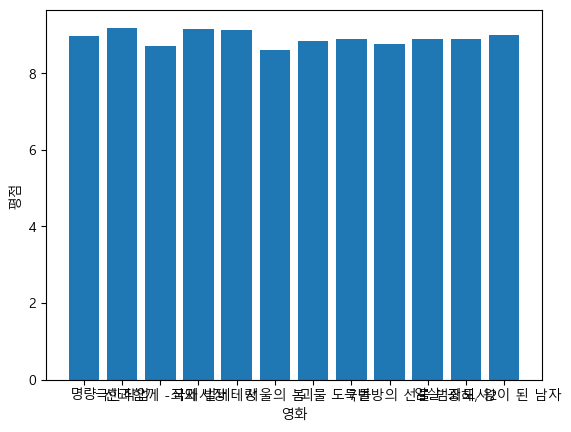

In [ ]:
# Quiz2) x 축은 영화명, y축은 평점인 막대 그래프를 작성하시오(matplotlib 이용)

plt.bar(x=df['영화'],height=df['평점'])
plt.xlabel('영화')
plt.ylabel('평점')

plt.show()

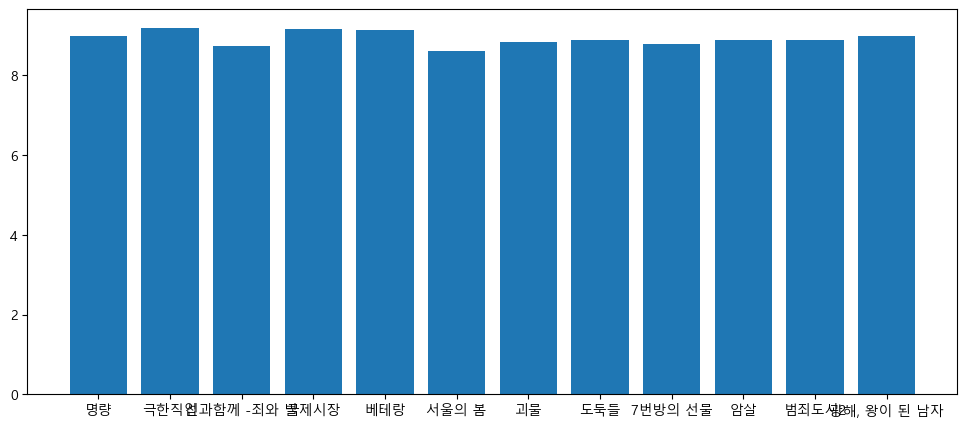

In [28]:
# inclass
# Quiz2) x 축은 영화명, y축은 평점인 막대 그래프를 작성하시오(matplotlib 이용)

plt.figure(figsize=(12,5))
plt.bar(df['영화'],df['평점'])

plt.show()

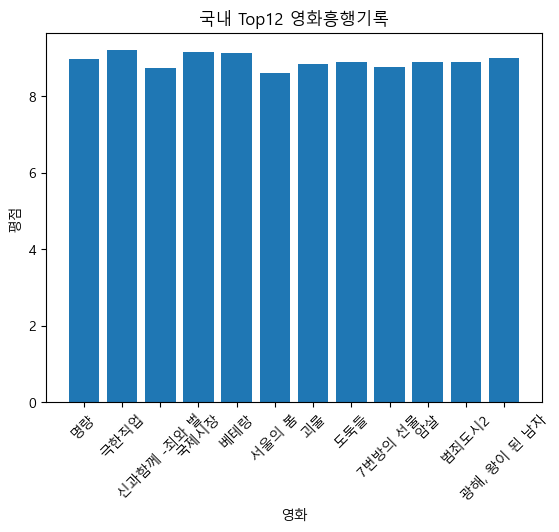

In [17]:
# Quiz3) Quiz2에서 작성한 그래프에 대해 세부 설정을 적용하시오
# 제목 : 국내 Top12 영화흥행기록
# x축 label : 영화, y축 label : 평점
# x축의 tick 은 45도로 설정

plt.bar(x=df['영화'],height=df['평점'])
plt.title('국내 Top12 영화흥행기록')
plt.xlabel('영화')
plt.ylabel('평점')
plt.xticks(rotation=45)

plt.show()


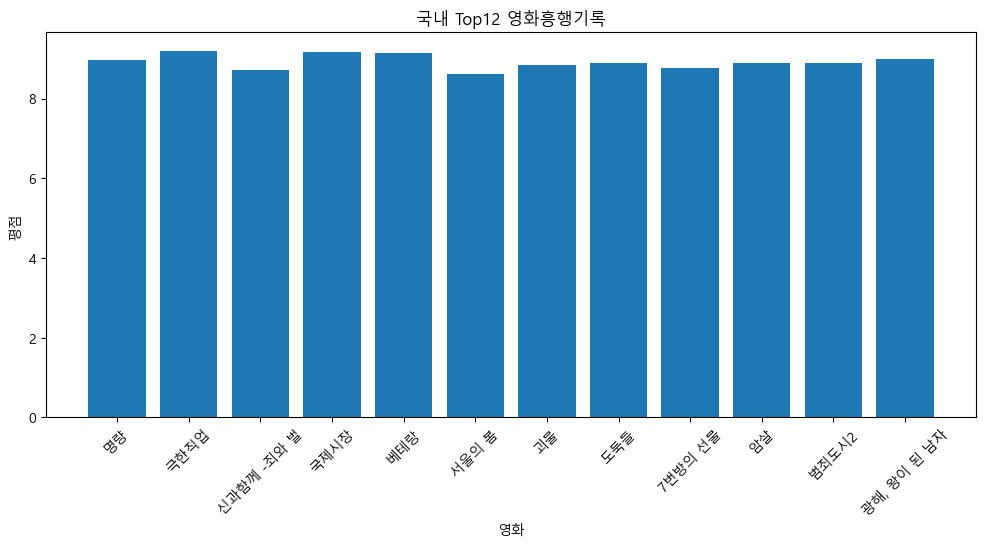

In [31]:
# inclass
# Quiz3) Quiz2에서 작성한 그래프에 대해 세부 설정을 적용하시오
# 제목 : 국내 Top12 영화흥행기록
# x축 label : 영화, y축 label : 평점
# x축의 tick 은 45도로 설정

plt.figure(figsize=(12,5))
plt.bar(x=df['영화'],height=df['평점'])
plt.title('국내 Top12 영화흥행기록')
plt.xlabel('영화')
plt.ylabel('평점')
plt.xticks(rotation=45)

plt.show()


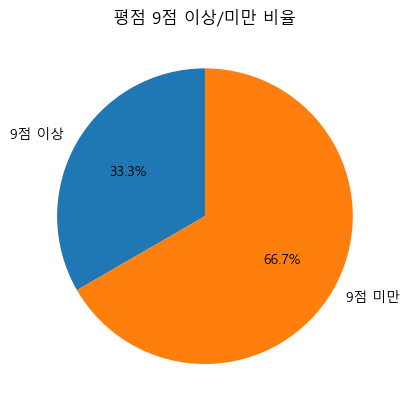

In [33]:
# Quiz4) 평점이 9점 이상인 영화와 아닌 영화의 비율을 확인할 수 있는 pie 그래프 작성(matplotlib 이용)

# ratio=[df[df['평점']>=9],df[df['평점']<9]]
# plt.pie(ratio,labels=[1,2])

high=len(df[df['평점']>=9])
low=len(df[df['평점']<9])

plt.pie([high,low],
        autopct='%.1f%%',
        labels=['9점 이상','9점 미만'],
        startangle=90
        )
plt.title('평점 9점 이상/미만 비율')

plt.show()

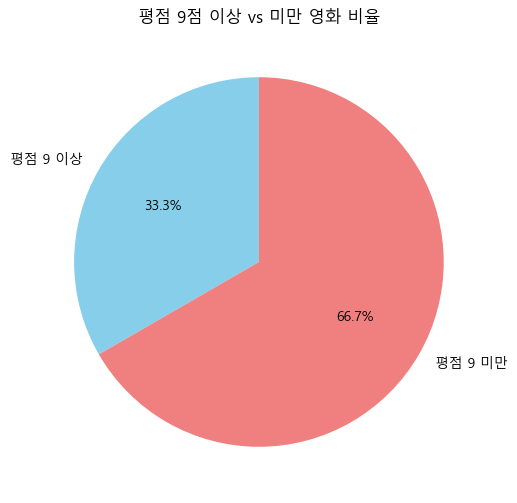

In [14]:
# GPT
# 각 범주별 영화 수
high_score = len(df[df['평점'] >= 9])
low_score = len(df[df['평점'] < 9])

# pie 차트
plt.figure(figsize=(6,6))
plt.pie([high_score, low_score],
        labels=['평점 9 이상', '평점 9 미만'],
        autopct='%1.1f%%',  # 비율 표시
        startangle=90,      # 첫 조각 시작 각도
        colors=['skyblue','lightcoral'])
plt.title('평점 9점 이상 vs 미만 영화 비율')
plt.show()

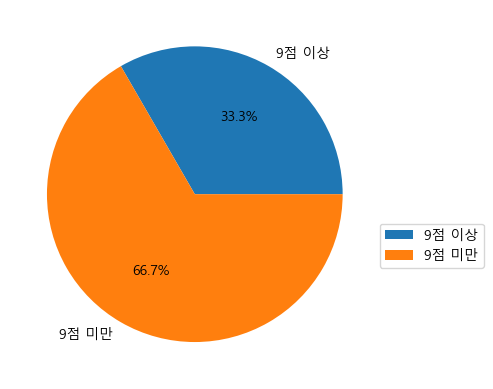

In [45]:
# inclass
# Quiz4) 평점이 9점 이상인 영화와 아닌 영화의 비율을 확인할 수 있는 pie 그래프 작성(matplotlib 이용)

filt=df['평점']>=9.0
values=[len(df[filt]),len(df[~filt])]

plt.pie(values,autopct='%.1f%%',labels=['9점 이상','9점 미만'])
plt.legend(loc=(1,0.3)) # 오른쪽 가장자리에서 살짝 위쪽

plt.show()

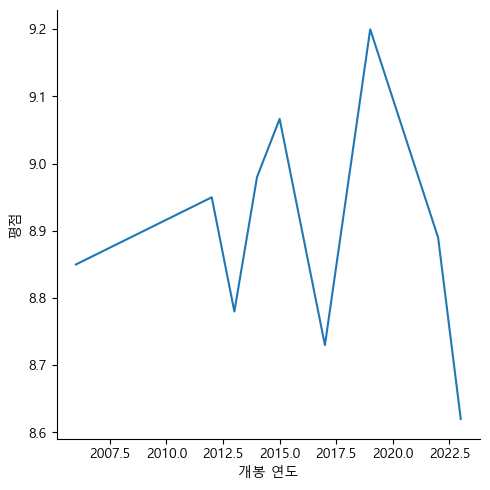

In [57]:
# Quiz5) 개봉연도별 평점 변화 추이를 선 그래프로 작성하시오.(seaborn 으로 한다.)
import seaborn as sns

g=sns.relplot(kind='line',x=df['개봉 연도'],y=df['평점'],errorbar=None)


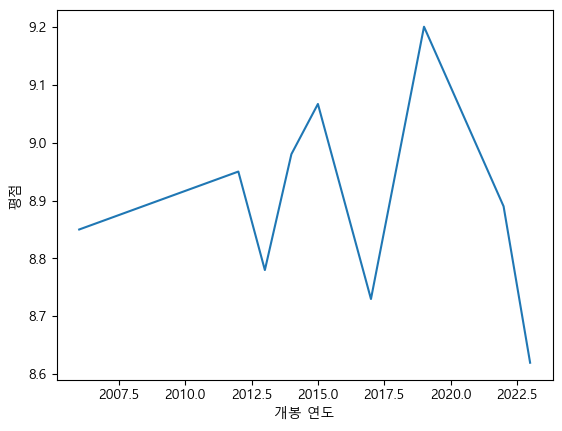

In [61]:
# inclass
# Quiz5) 개봉연도별 평점 변화 추이를 선 그래프로 작성하시오.(seaborn 으로 한다.)
import seaborn as sns
df1=df.groupby('개봉 연도')['평점'].mean().reset_index()
g= sns.lineplot(data=df1, x='개봉 연도',y='평점')


<Figure size 1000x500 with 0 Axes>

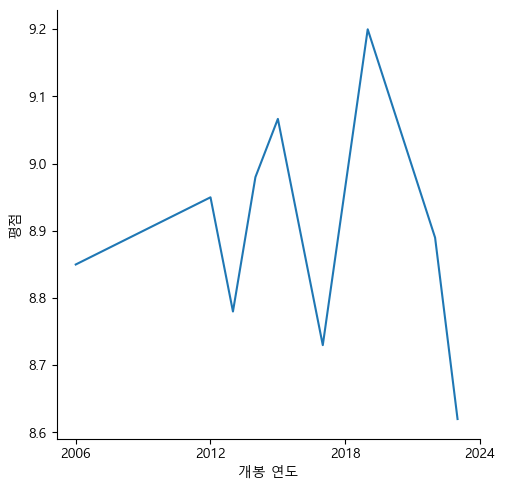

In [ ]:
# Quiz6) Quiz5에서 작성한 그래프의 x축 눈금 단위를 [2006,2012,2018,2024] 로 변경하시오.
# 그래프 사이즈는 (10,5) 로 지정

plt.figure(figsize=(10,5))
g=sns.relplot(kind='line',x=df['개봉 연도'],y=df['평점'],errorbar=None)
plt.xticks([2006,2012,2018,2024])
plt.show()

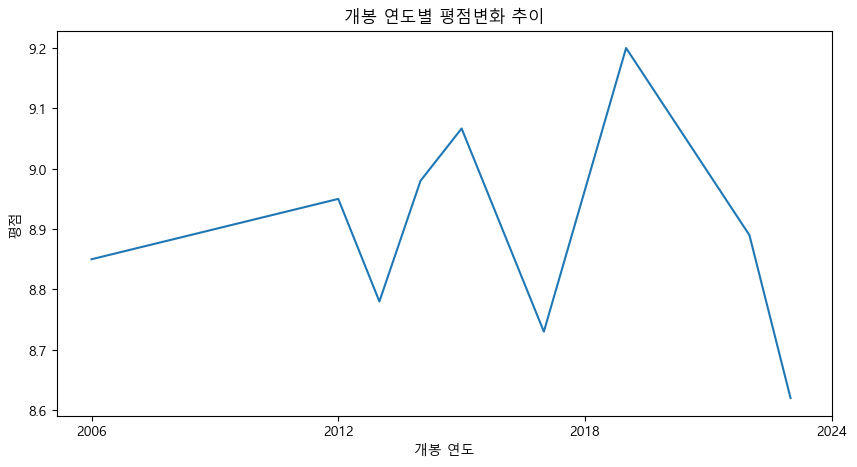

In [64]:
#inclass
# Quiz6) Quiz5에서 작성한 그래프의 x축 눈금 단위를 [2006,2012,2018,2024] 로 변경하시오.
# 그래프 사이즈는 (10,5) 로 지정

plt.figure(figsize=(10,5))
plt.title('개봉 연도별 평점변화 추이')
# g=sns.lineplot(data=df1,x='개봉 연도', y='평점').set_xticks(df1['개봉 연도'])
g=sns.lineplot(data=df1,x='개봉 연도', y='평점').set_xticks([2006,2012,2018,2024])

plt.show()

In [ ]:
# Quiz7) 오바마 연설문을 이용해 워드 클라우드를 작성해 보자

with open('data_analysis/data/obama.txt','r',encoding='utf-8') as f:
    text=f.read()

obama_mask= np.array(Image.open('data_analysis/img/alice_mask.png'))

stopwords=set(STOPWORDS)






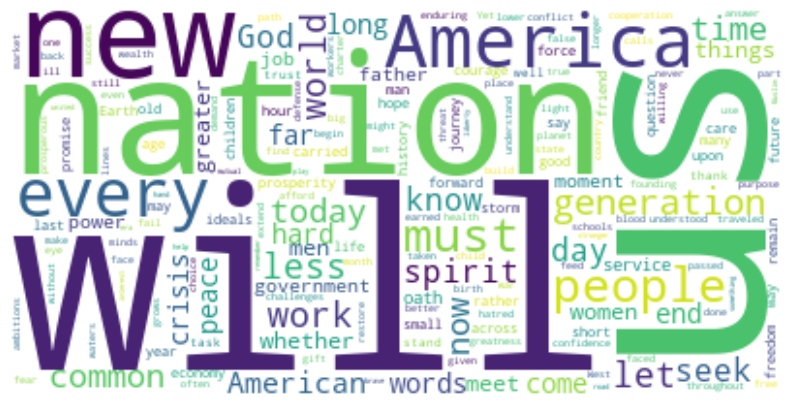

In [70]:
# inclass
# Quiz7) 오바마 연설문을 이용해 워드 클라우드를 작성해 보자

with open('data_analysis/data/obama.txt','r',encoding='utf-8') as f:
    text=f.read()

wc=WordCloud(background_color='white')
wc.generate(text)

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')
plt.show()